In [1]:
# Import stuff: 
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sympy import Symbol
from sympy.solvers import solve

# This is for reasonable fontsize universally defined:
fs_label = 16
parameters = {                
                'figure.titlesize': fs_label+6,
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.linewidth': 5,
                #'lines.marker':'o', 
                #'lines.markersize':4

             }
plt.rcParams.update(parameters)

# plt.rcParams.keys()

# We could also try with the colours:
#plt.rcParams['lines.color'] = 'r' # maybe here with more colours if needed?



In [2]:
# Heyo! please insert the correct parameters here!

R = 100 # resource
b = 1/50 # 
c_max = 200 # max consumption
M = 1/5 # metabolism
eps = 0.8 # efficiency
m0 = 0.2 # backgrond mortality
mp = 0.5 # mortality due to "predation"


theta_list = np.linspace(0, 1000, 10000)

# making the functional depandencies of trait theta
a=0.2

B = lambda theta: a*theta + b 
G = lambda theta: eps*(c_max*B(theta)*R/(c_max + B(theta)*R) - M) # gains
Mort = lambda theta: m0 + mp*theta #np.log(theta+1) # mortality

r = lambda theta: G(theta) - Mort(theta) # growth rate as function of trait theta

max_index = [i for i,v in enumerate(r(theta_list)) if v==max(r(theta_list))][0]
root_r = sp.optimize.root_scalar(r, bracket=[200, 400]).root


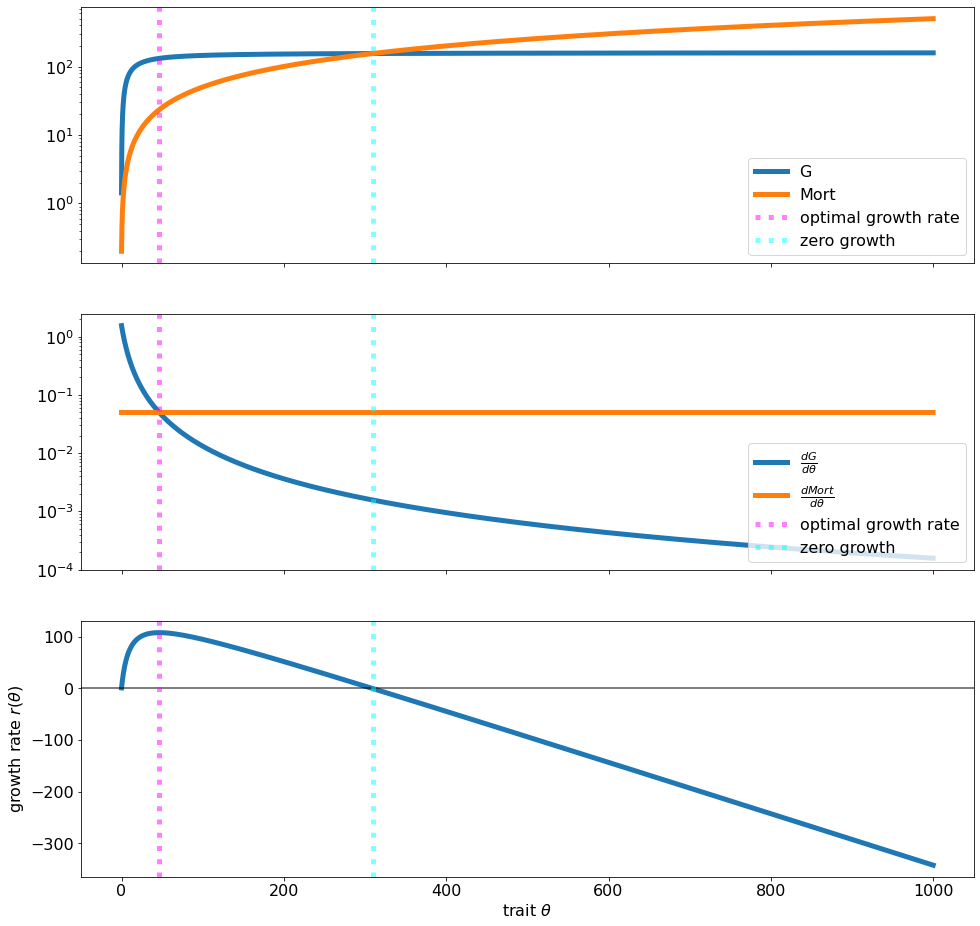

In [3]:
# if True:
fig, ax = plt.subplots(3, 1, figsize=(16,16), sharex=True)
#ax[0].plot(theta_list, B(theta_list), label="B")
ax[0].plot(theta_list, G(theta_list), label="G")
ax[0].plot(theta_list, Mort(theta_list), label="Mort")
ax[0].axvline(theta_list[max_index], linestyle=":", alpha=0.5, color="magenta", label="optimal growth rate")
ax[0].axvline(root_r, linestyle=":", alpha=0.5, color="cyan", label="zero growth")
ax[0].legend(loc="lower right")
ax[0].set_yscale("log")

#ax[1].plot(theta_list[:-1], np.diff(B(theta_list)), label="$\\frac{d B}{d \\theta}$")
ax[1].plot(theta_list[:-1], np.diff(G(theta_list)), label="$\\frac{d G}{d \\theta}$")
ax[1].plot(theta_list[:-1], np.diff(Mort(theta_list)), label="$\\frac{d Mort}{d \\theta}$")
ax[1].axvline(theta_list[max_index], linestyle=":", alpha=0.5, color="magenta", label="optimal growth rate")
ax[1].axvline(root_r, linestyle=":", alpha=0.5, color="cyan", label="zero growth")
ax[1].legend(loc="lower right")
ax[1].set_yscale("log")


#fig, ax = plt.subplots(figsize=(16,8))
ax[2].plot(theta_list, r(theta_list))
ax[2].axhline (0, linewidth=2, color="k", alpha=0.5)
ax[2].set_xlabel("trait $\\theta$")
ax[2].set_ylabel("growth rate $r(\\theta)$")
ax[2].axvline(theta_list[max_index], linestyle=":", alpha=0.5, color="magenta", label="optimal growth rate")
ax[2].axvline(root_r, linestyle=":", alpha=0.5, color="cyan", label="zero growth")

#ax.set_yscale("log")


In [4]:

tmp_theta_list = [theta_list[max_index] + i*3 for i in range(-10, 10)]
state_init = [100]*len(tmp_theta_list)
params = tuple(tmp_theta_list)

def deriv(state, t, *params):
    return np.array([r(theta)*state[i] for i, theta in enumerate(params)])

t_list = np.linspace(0, 5, 1000)
ns = odeint(deriv, state_init, t_list, args=params)
#fig, ax = plt.subplots(figsize=(16,8))
#ax.plot(t_list, ns)
#ax.set_yscale("log")

16.504650465046502
19.504650465046502
22.504650465046502
25.504650465046502
28.504650465046502
31.504650465046502
34.5046504650465
37.5046504650465
40.5046504650465
43.5046504650465
46.5046504650465
49.5046504650465
52.5046504650465
55.5046504650465
58.5046504650465
61.5046504650465
64.5046504650465
67.5046504650465
70.5046504650465
73.5046504650465


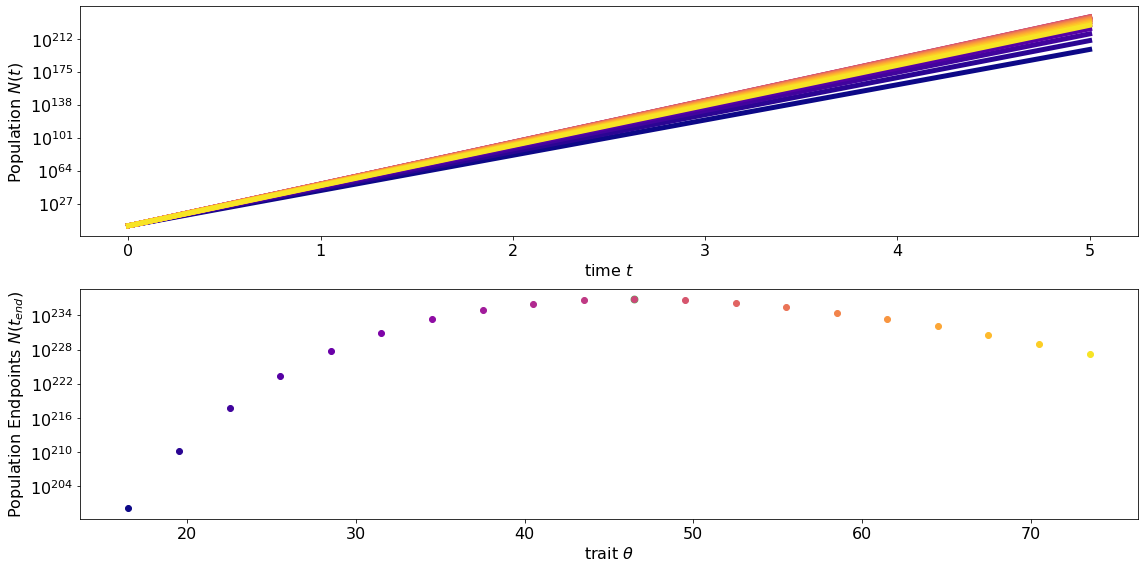

In [5]:
fig, ax = plt.subplots(2, 1, figsize=(16,8), tight_layout=True)
for i, e in enumerate(zip(tmp_theta_list, ns.T)):
    tmp_theta, sol = e
    j = i/len(tmp_theta_list)
    print(tmp_theta) 
    if tmp_theta == theta_list[max_index]:
        ax[1].scatter(tmp_theta, sol[-1], s=50, color="green", alpha=0.5, label="optimal growth") # this dont plot for some reason...
    ax[0].plot(t_list, sol, color=plt.cm.plasma(j), label=f"$\\theta = {round(tmp_theta,2)}$")
    ax[1].scatter(tmp_theta, sol[-1], color=plt.cm.plasma(j), label=f"$\\theta = {round(tmp_theta,2)}$")

ax[0].set_ylabel("Population $N(t)$")
ax[0].set_xlabel("time $t$")
ax[0].set_yscale("log")
# ax[0].legend()
#ax[0].legend(bbox_to_anchor=(1.2,1.15)) ### Something is wring with this legend, when using tight layout...

ax[1].set_ylabel("Population Endpoints $N(t_{end})$")
ax[1].set_xlabel("trait $\\theta$")
ax[1].set_yscale("log")
#ax[1].legend()





In [6]:
tmp_theta_list = [theta_list[max_index] + i*3 for i in range(-10, 10)]
state_init = [1/len(tmp_theta_list)]*len(tmp_theta_list)
params = tuple(tmp_theta_list)

def deriv_compare(state, t, *params):
    s = lambda cur_theta: np.sum(np.array([(r(cur_theta) - r(theta))*state[i] for i, theta in enumerate(params)]))
    pdots = np.array([state[i]*s(theta) for i, theta in enumerate(params)])
    return pdots


#ns = np.array([timestep/np.sum(timestep) for timestep in ns])


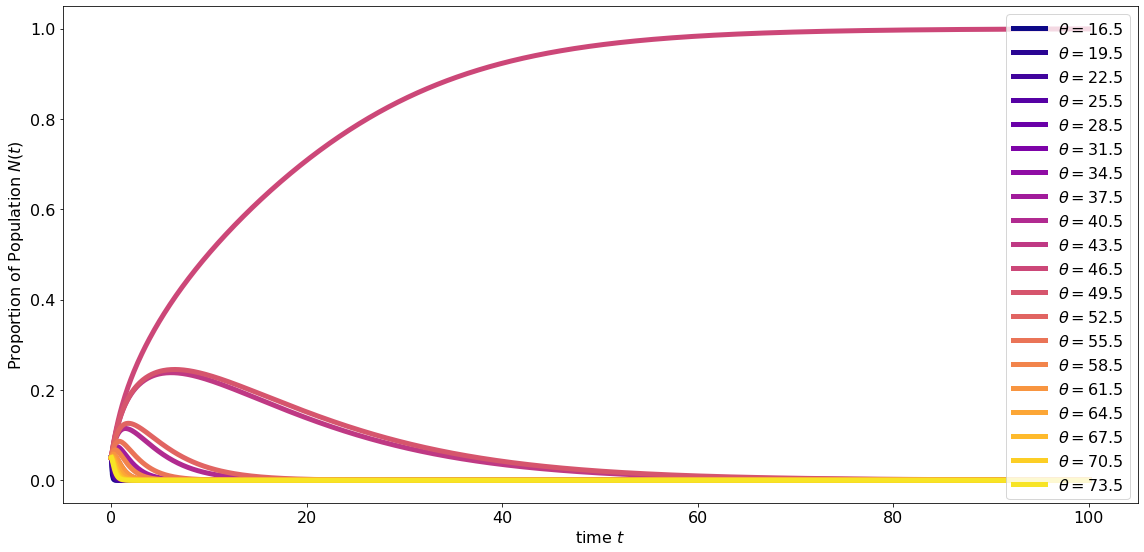

In [10]:
# Long time scale: 
t_list = np.linspace(0, 100, 1000)
ns = odeint(deriv_compare, state_init, t_list, args=params)

fig, ax = plt.subplots(figsize=(16,8), tight_layout=True)
for i, e in enumerate(zip(tmp_theta_list, ns.T)):
    tmp_theta, sol = e
    j = i/len(tmp_theta_list)
    ax.plot(t_list, sol, color=plt.cm.plasma(j), label=f"$\\theta = {round(tmp_theta,2)}$")

ax.set_ylabel("Proportion of Population $N(t)$")
ax.set_xlabel("time $t$")
#ax.set_yscale("log")
ax.legend()

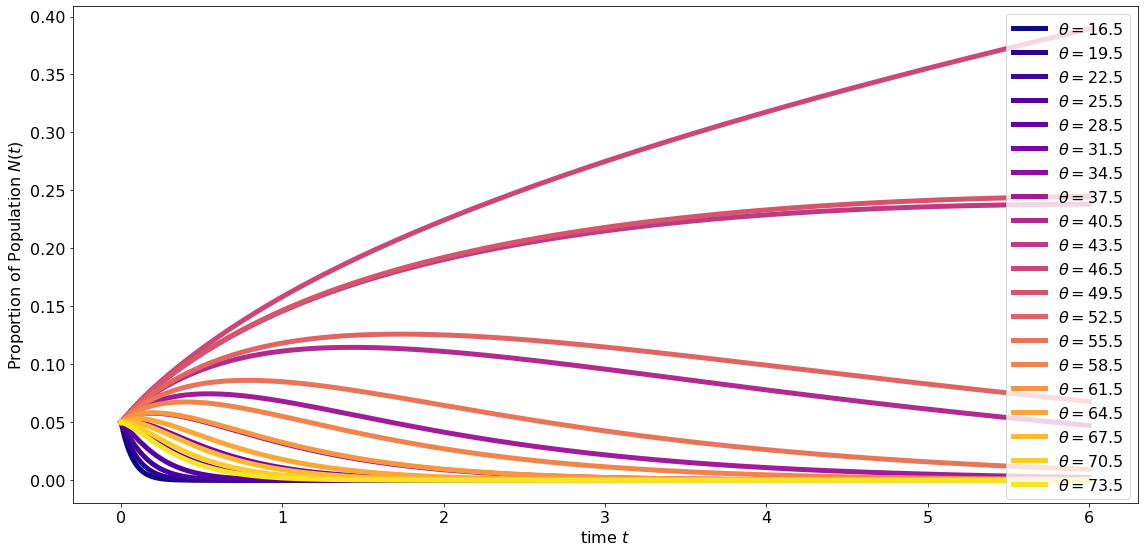

In [11]:
# Long time scale: 

t_list = np.linspace(0, 6, 1000)
ns = odeint(deriv_compare, state_init, t_list, args=params)

fig, ax = plt.subplots(figsize=(16,8), tight_layout=True)
for i, e in enumerate(zip(tmp_theta_list, ns.T)):
    tmp_theta, sol = e
    j = i/len(tmp_theta_list)
    ax.plot(t_list, sol, color=plt.cm.plasma(j), label=f"$\\theta = {round(tmp_theta,2)}$")

ax.set_ylabel("Proportion of Population $N(t)$")
ax.set_xlabel("time $t$")
#ax.set_yscale("log")
ax.legend()

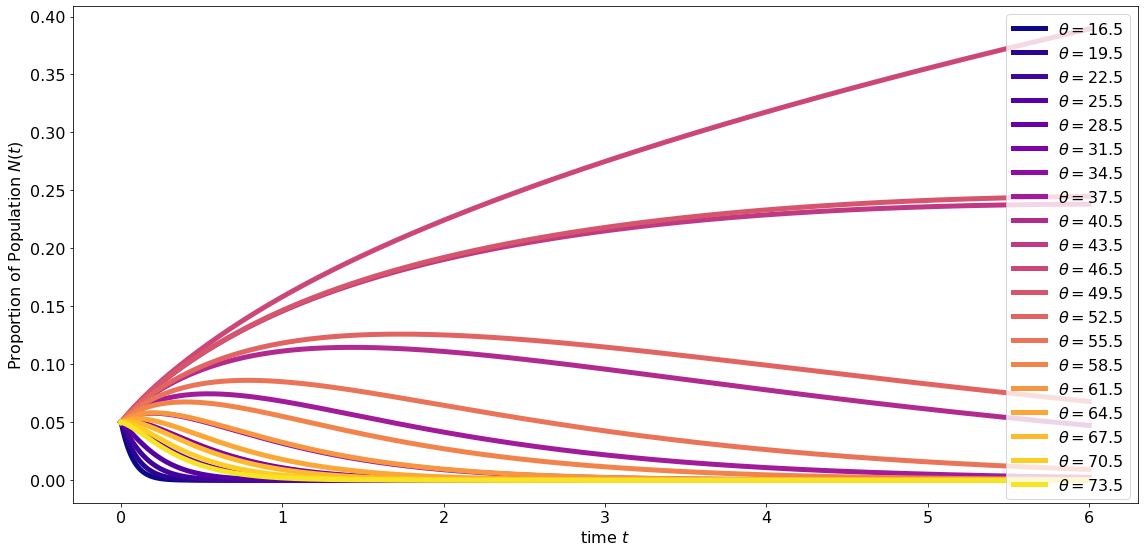

In [12]:
# compare to the direct calculation (unstable for ca t>6)
t_list = np.linspace(0, 6, 1000)
ns = odeint(deriv, state_init, t_list, args=params)
ns = np.array([timestep/np.sum(timestep) for timestep in ns])

fig, ax = plt.subplots(figsize=(16,8), tight_layout=True)
for i, e in enumerate(zip(tmp_theta_list, ns.T)):
    tmp_theta, sol = e
    j = i/len(tmp_theta_list)
    #print(tmp_theta) 
    ax.plot(t_list, sol, color=plt.cm.plasma(j), label=f"$\\theta = {round(tmp_theta,2)}$")

ax.set_ylabel("Proportion of Population $N(t)$")
ax.set_xlabel("time $t$")
#ax.set_yscale("log")
ax.legend()